# MATHS Demonstration of added utility depending on time to IVT and MT

In this notebook we examine the relationship between time to treatment and the effect of treatment.

Outcome results are calculated for three patients groups:

1. nLVO receiving IVT
2. LVO receiving IVT only
3. LVO receiving MT (data based on trails where 85% had also received IVT)

When we look at combined effect of these groups, we make some basic assumptions (which are used as being 'reasonable' rather than 'definitive'):

* 20% of all ischaemic stroke admissions receive IVT and/or MT.
* 35% of our treated population have LVO.
* 28.6% of LVO receive MT (this gives 10% of all ischaemic strokes receiving MT)
* 85% of LVO receiving MT have received IVT (from clinical trials  data); for those 85% if the benefit of IVT exceed the benefit of MT (e.g. very early IVT, and very late MT), then the benefit is based on IVT.
* 15.5% nLVO receive thrombolysis (this brings total IVT to 20% use).


## Load packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # for axis tick locations

import numpy as np
import pandas as pd
import copy
import os

from IPython.display import Math  # to display equation strings nicely

from stroke_outcome.continuous_outcome import Continuous_outcome

import warnings
warnings.filterwarnings("ignore")

In [3]:
dir_output = 'output'
dir_images = 'images'

## Set up model

In [4]:
# Set up outcome model
outcome_model = Continuous_outcome()

## Individual treatment effects

Here we consider the impact, and effect of time to treatment, for three cohorts independently:

1. nLVO receiving IVT
2. LVO receiving IVT only
3. LVO receiving MT (data based on trails where 85% had also received IVT)

Set up shared treatment times:

In [5]:
max_time_to_ivt = 6.3 * 60  # minutes
max_time_to_mt = 8.0 * 60  # minutes

Import the patient data from the previous notebook:

In [6]:
df_patients = pd.read_csv(os.path.join(dir_output, 'mean_outcomes_with_time.csv'))

In [7]:
df_patients

,onset_to_needle_mins,onset_to_puncture_mins,stroke_type_code,ivt_chosen_bool,mt_chosen_bool,label,added_utility,mean_mrs,mrs_less_equal_2
0,0.0,0.0,1,1,0,nlvo_ivt,0.158130,1.391000,0.752000
1,10.0,10.0,1,1,0,nlvo_ivt,0.154488,1.413068,0.747977
2,20.0,20.0,1,1,0,nlvo_ivt,0.150806,1.435297,0.743910
3,30.0,30.0,1,1,0,nlvo_ivt,0.147083,1.457685,0.739801
4,40.0,40.0,1,1,0,nlvo_ivt,0.143322,1.480229,0.735649
...,...,...,...,...,...,...,...,...,...
122,440.0,440.0,2,0,1,lvo_mt,0.007830,3.625716,0.275533
123,450.0,450.0,2,0,1,lvo_mt,0.002522,3.652821,0.270305
124,460.0,460.0,2,0,1,lvo_mt,-0.002750,3.679736,0.265140
125,470.0,470.0,2,0,1,lvo_mt,-0.007984,3.706462,0.260038


### Straight line fits

These outcomes with time are not _quite_ straight lines, but we will approximate them as straight lines and see how closely they match.

The following two cells find the equations of the straight line for each cohort and outcome type combination.

In [8]:
# Data setup:
# The order of the keys in these dictionaries
# sets up which outcome goes in which axis, and
# which cohort uses each colour and linestyle.
# The value for each key is the prettier label to be displayed.
outcome_labels = {
    'mean_mrs': 'Mean mRS',
    'mrs_less_equal_2': r'Proportion with mRS$\leq$2',
    'added_utility': 'Added utility',
}
cohort_labels = {
    'nlvo_ivt': 'nLVO: IVT',
    'lvo_ivt': 'LVO: IVT',
    'lvo_mt': 'LVO: MT',
}

In [9]:
def make_equation_string(gradient, y_intercept):
    eqn_str = r'$y = \frac{' + f'{gradient:.3f}' + r'}{1 hr}' + f't {y_intercept:+.3f}$'
    return eqn_str

In [10]:
dict_straight_lines = {}

for i, outcome_label in enumerate(outcome_labels.keys()):
    dict_straight_lines[outcome_label] = {}
    for j, cohort_label in enumerate(cohort_labels.keys()):
        data_here = df_patients[df_patients['label'] == cohort_label]

        t_max = max_time_to_mt if 'mt' in cohort_label else max_time_to_ivt
        y_intercept = data_here[outcome_label].values[0]
        gradient = (
            (data_here[outcome_label].values[-1] - data_here[outcome_label].values[0]) /
            (t_max)
        )
        # This gradient is in terms of minutes.
        # Convert to hours:
        gradient_hr = gradient * 60.0
        eqn_str = make_equation_string(gradient_hr, y_intercept)

        dict_straight_lines[outcome_label][cohort_label] = {}
        dict_straight_lines[outcome_label][cohort_label]['y_intercept'] = y_intercept
        dict_straight_lines[outcome_label][cohort_label]['gradient_minutes'] = gradient
        dict_straight_lines[outcome_label][cohort_label]['gradient_hours'] = gradient_hr
        dict_straight_lines[outcome_label][cohort_label]['eqn_str'] = eqn_str

View the results:

In [11]:
for key, value in dict_straight_lines.items():
    print(key)
    display(pd.DataFrame(value))

mean_mrs


,nlvo_ivt,lvo_ivt,lvo_mt
y_intercept,1.391,3.176,2.244
gradient_minutes,0.002455,0.001447,0.003102
gradient_hours,0.147302,0.086825,0.186125
eqn_str,$y = \frac{0.147}{1 hr}t +1.391$,$y = \frac{0.087}{1 hr}t +3.176$,$y = \frac{0.186}{1 hr}t +2.244$


mrs_less_equal_2


,nlvo_ivt,lvo_ivt,lvo_mt
y_intercept,0.752,0.361,0.548
gradient_minutes,-0.000471,-0.00028,-0.00061
gradient_hours,-0.028254,-0.016825,-0.036625
eqn_str,$y = \frac{-0.028}{1 hr}t +0.752$,$y = \frac{-0.017}{1 hr}t +0.361$,$y = \frac{-0.037}{1 hr}t +0.548$


added_utility


,nlvo_ivt,lvo_ivt,lvo_mt
y_intercept,0.15813,0.08938,0.2646
gradient_minutes,-0.000434,-0.000267,-0.000579
gradient_hours,-0.026065,-0.016041,-0.034723
eqn_str,$y = \frac{-0.026}{1 hr}t +0.158$,$y = \frac{-0.016}{1 hr}t +0.089$,$y = \frac{-0.035}{1 hr}t +0.265$


### Plot outcomes with time


The following function plots the outcomes with time.

In [12]:
from plot_matrix import plot_outcomes_with_time

Setup for plot:

In [13]:
# First three colours of seaborn colourblind:
colours = ['#0072B2', '#009E73', '#D55E00'] 
linestyles = ['-', '--', '-.']

# Set up axis conversion between minutes and hours:
use_hours=True
if use_hours:
    unit_str = 'hours'
    x_times_scale = (1.0 / 60.0)
    xtick_max = (max_time_to_mt+1)/60.0
    major_step = 1
    minor_step = (15.0/60.0) # 15 minutes
else:
    unit_str = 'minutes'
    x_times_scale = 1.0
    xtick_max = max_time_to_mt+1
    major_step = 60.0
    minor_step = 10.0

# Data setup:
# The order of the keys in these dictionaries
# sets up which outcome goes in which axis, and
# which cohort uses each colour and linestyle.
# The value for each key is the prettier label to be displayed.
outcome_labels = {
    'mean_mrs': 'Mean mRS',
    'mrs_less_equal_2': r'Proportion with mRS$\leq$2',
    'added_utility': 'Added utility',
}
cohort_labels = {
    'nlvo_ivt': 'nLVO: IVT',
    'lvo_ivt': 'LVO: IVT',
    'lvo_mt': 'LVO: MT',
}

Plot the straight line fits over the actual data:

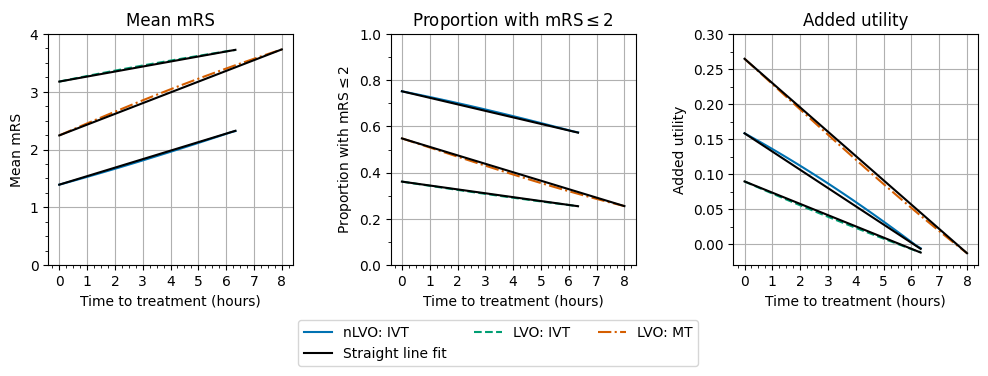

In [14]:
plot_outcomes_with_time(
    df_patients,
    outcome_labels,
    cohort_labels,
    x_times_scale,
    colours,
    linestyles,
    unit_str,
    major_step,
    minor_step,
    dict_straight_lines,
    savename = './images/time_to_treatment_fits.jpg'
)

## Import outcome matrices

The grids use these treatment times:

In [15]:
t_step = 10
time_to_ivt = np.arange(0, max_time_to_ivt + 1, t_step)
time_to_mt = np.arange(0, max_time_to_mt + 1, t_step)

Import matrices from file:

In [16]:
dict_df_patients = {}

for key in ['nlvo_ivt', 'lvo_ivt_only', 'lvo_mt_only', 'lvo_ivt_mt', 'lvo', 'treated_ischaemic']:
    df = pd.read_csv(os.path.join(dir_output, f'outcome_matrix_{key}.csv'))
    dict_df_patients[key] = df

In [17]:
for key, df in dict_df_patients.items():
    print(key)
    display(df.head(2))

nlvo_ivt


,onset_to_needle_mins,onset_to_puncture_mins,stroke_type_code,ivt_chosen_bool,mt_chosen_bool,added_utility,mean_mrs,mrs_less_equal_2,mrs_shift
0,0.0,0.0,1,1,0,0.158130,1.391000,0.752000,-0.889000
1,10.0,0.0,1,1,0,0.154488,1.413068,0.747977,-0.866932


lvo_ivt_only


,onset_to_needle_mins,onset_to_puncture_mins,stroke_type_code,ivt_chosen_bool,mt_chosen_bool,added_utility,mean_mrs,mrs_less_equal_2,mrs_shift
0,0.0,0.0,2,1,0,0.089380,3.176000,0.361000,-0.464000
1,10.0,0.0,2,1,0,0.086467,3.192402,0.357948,-0.447598


lvo_mt_only


,onset_to_needle_mins,onset_to_puncture_mins,stroke_type_code,ivt_chosen_bool,mt_chosen_bool,added_utility,mean_mrs,mrs_less_equal_2,mrs_shift
0,0.0,0.0,2,0,1,0.2646,2.244,0.548,-1.396
1,10.0,0.0,2,0,1,0.2646,2.244,0.548,-1.396


lvo_ivt_mt


,onset_to_needle_mins,onset_to_puncture_mins,stroke_type_code,ivt_chosen_bool,mt_chosen_bool,added_utility,mean_mrs,mrs_less_equal_2,mrs_shift
0,0.0,0.0,2,1,1,0.2646,2.244,0.548,-1.396
1,10.0,0.0,2,1,1,0.2646,2.244,0.548,-1.396


lvo


,added_utility,mean_mrs,mrs_less_equal_2,mrs_shift,onset_to_needle_mins,onset_to_puncture_mins
0,0.251022,2.316221,0.533509,-1.323779,0.0,0.0
1,0.250796,2.317492,0.533273,-1.322508,10.0,0.0


treated_ischaemic


,added_utility,mean_mrs,mrs_less_equal_2,mrs_shift,onset_to_needle_mins,onset_to_puncture_mins
0,0.204965,1.857484,0.641840,-1.108209,0.0,0.0
1,0.203045,1.869066,0.639726,-1.096627,10.0,0.0


### Find where LVO with IVT and MT uses each outcome

Patients who receive both IVT and MT are given the outcomes associated with whichever treatment gives the better added utility. In most cases the better treatment is MT, but the IVT data can be used when the time to IVT is low and the time to MT is high.

Eyeballing the matrix, the boundary between the IVT and MT regime is approximately $t_{\mathrm{MT}} = 4.75 hr + 0.5 \times t_{\mathrm{IVT}}$. 

Approximate this limit by scribbling on the IVT-MT matrix.

Take the columns of data, reshape them into grids, and display the grids with a colour scale.

Setup for plots:

In [42]:
# Instead of the axes showing the row, column numbers of the grid,
# use this extent to scale the row, column numbers to the times.
# Extra division by 60 for conversion to hours.
grid_extent = np.array([
    min(time_to_ivt) - t_step * 0.5, max(time_to_ivt) + t_step * 0.5,  # x-limits
    min(time_to_mt) - t_step * 0.5, max(time_to_mt) + t_step * 0.5     # y-limits
]) / 60.0

# How many rows and columns of data are there?
grid_shape = (len(time_to_mt), len(time_to_ivt))

# Data setup:
# The order of the keys in these dictionaries
# sets up which outcome goes in which axis, and
# which cohort uses each colour and linestyle.
# The value for each key is the prettier label to be displayed.
outcome_labels = {
    'added_utility': 'Added utility',
    'mrs_shift': 'Mean change in mRS',
}
cohort_labels = {
    'nlvo_ivt': 'nLVO treated with IVT',
    'lvo_ivt_only': 'LVO treated with IVT',
    'lvo_mt_only': 'LVO treated with MT',
    'lvo_ivt_mt': 'LVO treated with IVT and MT',
}

# Data sources:
dfs = {
    'nlvo_ivt': dict_df_patients['nlvo_ivt'],
    'lvo_ivt_only': dict_df_patients['lvo_ivt_only'],
    'lvo_mt_only': dict_df_patients['lvo_mt_only'],
    'lvo_ivt_mt': dict_df_patients['lvo_ivt_mt'],
}

# Colour setup.
cmaps = ['plasma', 'viridis_r']
# Pick out shared colour scale limits:
vlims = {
    'added_utility': [
        min([df['added_utility'].min() for df in dfs.values()]),
        max([df['added_utility'].max() for df in dfs.values()]),
    ],
    'mrs_shift': [
        min([df['mrs_shift'].min() for df in dfs.values()]),
        max([df['mrs_shift'].max() for df in dfs.values()]),
    ],
}
# Shared contour levels:
levels = {
    'added_utility': np.arange(0.00, 0.25 + 0.01, 0.02),
    'mrs_shift': np.round(np.arange(-1.20, 0.00 + 0.01, 0.05), 2),
}

Plotting:

In [19]:
from plot_matrix import plot_matrices

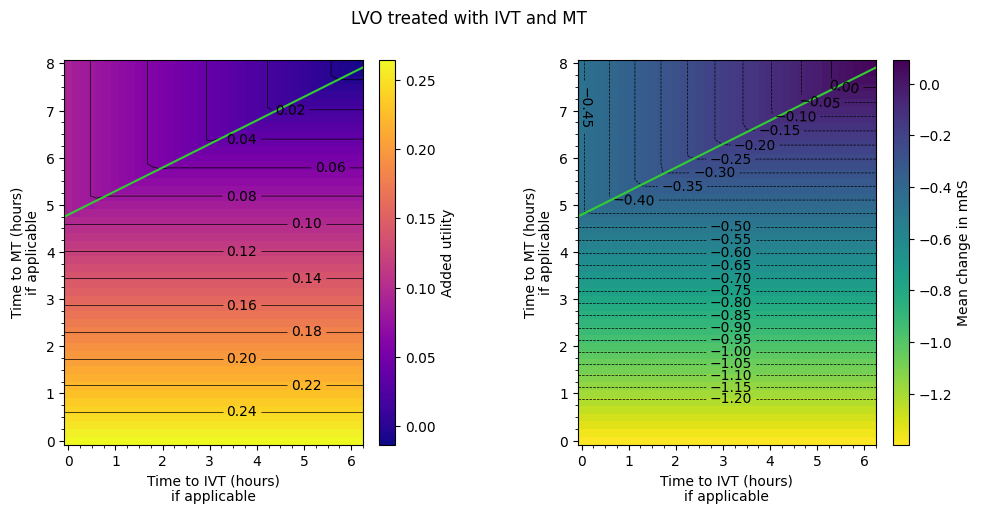

In [20]:
cohort_name = 'lvo_ivt_mt'
cohort_label = cohort_labels[cohort_name]

fig, axs = plot_matrices(
    dfs[cohort_name],
    outcome_labels,
    grid_shape,
    grid_extent,
    vlims,
    major_step,
    minor_step,
    levels,
    title=cohort_label,
    cmaps=cmaps,
    return_axs=True
)

for ax in [axs[0], axs[3]]:
    # Scribble:
    x0 = grid_extent[0]
    x1 = grid_extent[1]
    y0 = 4.75
    gradient = 0.5
    y1 = y0 + gradient * (x1 - x0)
    ax.plot([x0, x1], [y0, y1], color='LimeGreen')

### More thorough equation

Pick out which parts of the grid use the IVT-only results and which parts use the MT-only results.

In [21]:
added_util_lvo_ivt_only = dfs['lvo_ivt_only']['added_utility'].values.reshape(grid_shape)
added_util_lvo_mt_only = dfs['lvo_mt_only']['added_utility'].values.reshape(grid_shape)
added_util_lvo_ivt_mt = dfs['lvo_ivt_mt']['added_utility'].values.reshape(grid_shape)

In [22]:
added_util_lvo_uses_ivt = added_util_lvo_ivt_mt == added_util_lvo_ivt_only
added_util_lvo_uses_mt = added_util_lvo_ivt_mt == added_util_lvo_mt_only

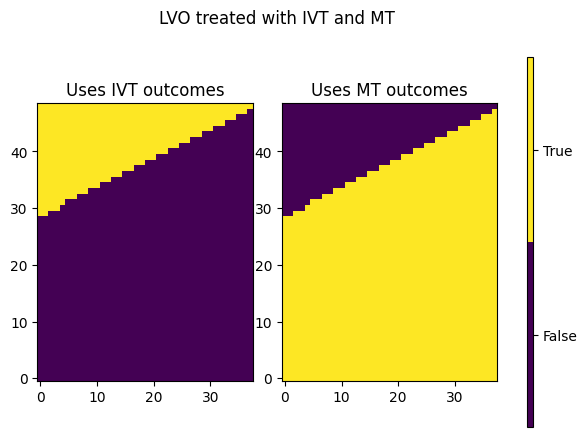

In [23]:
fig, axs = plt.subplots(1, 3, gridspec_kw={'width_ratios': [32, 32, 1]})

c = axs[0].imshow(added_util_lvo_uses_ivt, origin='lower', cmap=plt.get_cmap('viridis', 2))
axs[1].imshow(added_util_lvo_uses_mt, origin='lower', cmap=plt.get_cmap('viridis', 2))

plt.colorbar(c, cax=axs[2])
axs[2].set_yticks([0.25, 0.75])
axs[2].set_yticklabels(['False', 'True'])

axs[0].set_title('Uses IVT outcomes')
axs[1].set_title('Uses MT outcomes')
fig.suptitle('LVO treated with IVT and MT')

plt.show()

Pick out values along the boundary:

In [24]:
ind_x0_boundary = np.where(added_util_lvo_uses_ivt[:, 0] == 1)[0][0]
ind_x1_boundary = np.where(added_util_lvo_uses_ivt[:, -1] == 1)[0][0]

ind_x0_boundary, ind_x1_boundary

(29, 48)

Translate these into treatment times:

In [25]:
y_intercept = time_to_mt[ind_x0_boundary]
y_end = time_to_mt[ind_x1_boundary]

print(f'Minutes: {y_intercept:7.3f}, {y_end:7.3f}')
print(f'Hours  : {y_intercept / 60.0:7.3f}, {y_end / 60.0:7.3f}')

Minutes: 290.000, 480.000
Hours  :   4.833,   8.000


These times are only accurate to the spacing in the grid, which in hours is:

In [26]:
t_step / 60.0

0.16666666666666666

The gradient of this line is:

In [27]:
gradient = (y_end - y_intercept) / (time_to_ivt[-1] - time_to_ivt[0])

In [28]:
gradient

0.5135135135135135

So the eyeballed equation is good enough.

## Combining patient groups

Here we examined the combined effect of IVT and MT on outcomes across nLVO and LVO ischaemic strokes.


In [29]:
patient_proportions = pd.read_csv(
    os.path.join('..', 'england_wales', 'output', 'patient_proportions.csv'),
    index_col=0, header=None).squeeze()

In [30]:
patient_proportions

0
haemorrhagic         0.13600
lvo_no_treatment     0.14648
lvo_ivt_only         0.00840
lvo_ivt_mt           0.08500
lvo_mt_only          0.01500
nlvo_no_treatment    0.50252
nlvo_ivt             0.10660
Name: 1, dtype: float64

### Plot LVO mix

The outcome matrices have contours drawn across them. They show that the same resulting outcome can be found by many combinations of treatment times. By finding an equation for these contours, we can make general comments about how an increase in time to IVT needs to be matched with a given decrease in time to MT in order to find the same outcome.

To do this, we write the combined LVO mix matrix as an equation:

$$
u = p_i(m_i \cdot t_i + c_i) + p_m(m_m \cdot t_m + c_m)
$$

where $m$ and $c$ are the gradient and y-intercept of the straight line fits we found earlier, and $p$ is the proportion of that group that makes up the cohort. Then $t_1$ is the time to treatment for the first group and $t_2$ for the second group. The small letters $i$ and $m$ are for IVT and MT.

We then define two sets of treatment times, $t_{i,1}$ and $t_{m,1}$ and $t_{i,2}$ and $t_{m,2}$ and say that these have the same utility. Then the two equations can be set equal to each other:

$$
p_i(m_i \cdot t_{i,1} + c_i) + p_m(m_m \cdot t_{m,1} + c_m) = p_i(m_i \cdot t_{i,2} + c_i) + p_m(m_m \cdot t_{m,2} + c_m)
$$

The constants $c$ are the same on both sides so cancel them out:

$$
p_i(m_i \cdot t_{i,1}) + p_m(m_m \cdot t_{m,1}) = p_i(m_i \cdot t_{i,2}) + p_m(m_m \cdot t_{m,2})
$$

We then set the second pairs to be equal to the first plus a factor $x$ or $y$. 

$$
t_{i,2} = t_{i,1} + y
$$
$$
t_{m,2} = t_{m,1} + x
$$

We'll then look to find a way of describing $x$ in terms of $y$.

Replacing the second group of times:

$$
p_i(m_i \cdot t_{i,1}) + p_m(m_m \cdot t_{m,1}) = p_i[m_i \cdot (t_{i,1} + y)] + p_m[m_m \cdot (t_{m,1} + x)]
$$

Then everything involving $t_1$ cancels out.

$$
0 = p_i \cdot m_i \cdot y + p_m \cdot m_m \cdot + x
$$

Rearrange to find $x$:

$$
x = -\frac{p_i \cdot m_i}{p_m \cdot m_m}y
$$

In [44]:
prop_lvo_treated = patient_proportions['lvo_ivt_only'] + patient_proportions['lvo_ivt_mt'] + patient_proportions['lvo_mt_only']

prop_lvo_treated

0.10840000000000001

In [45]:
p_i = patient_proportions['lvo_ivt_only'] / prop_lvo_treated
p_im = patient_proportions['lvo_ivt_mt'] / prop_lvo_treated
p_m = patient_proportions['lvo_mt_only'] / prop_lvo_treated

g_i = dict_straight_lines['added_utility']['lvo_ivt']['gradient_hours']
g_m = dict_straight_lines['added_utility']['lvo_mt']['gradient_hours']

When IVT is better, the IVT&MT population uses the IVT results and its proportion `p_im` goes with the IVT numbers:

In [46]:
x_ivt_better = - ((p_i + p_im) * g_i) / (p_m * g_m)

x_ivt_better

-2.8766258250886376

When MT is better, the IVT&MT population uses the MT results and its proportion `p_im` goes with the MT numbers:

In [47]:
x_mt_better = - (p_i * g_i) / ((p_im + p_m) * g_m)

x_mt_better

-0.03880672954616362

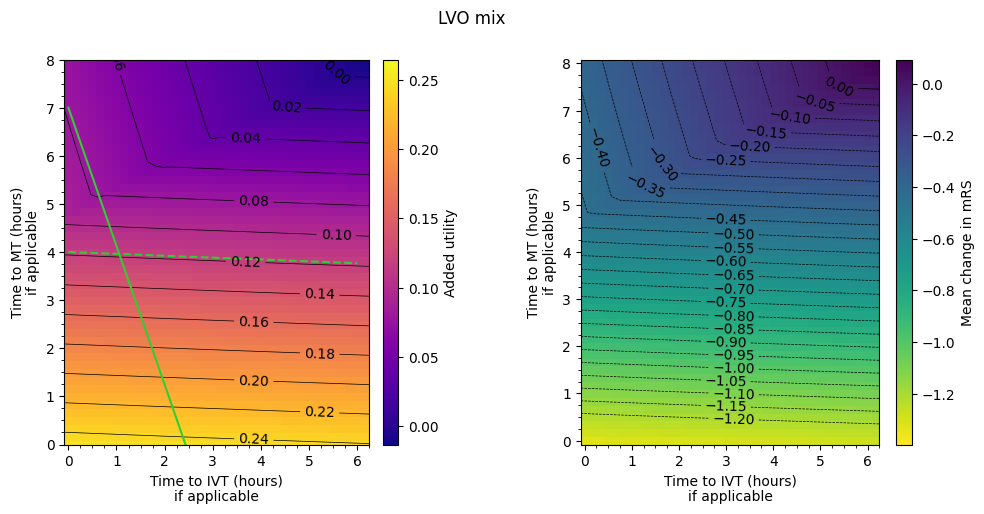

In [48]:
fig, axs = plot_matrices(
    dict_df_patients['lvo'],
    outcome_labels,
    grid_shape,
    grid_extent,
    vlims,
    major_step,
    minor_step,
    levels,
    title='LVO mix',
    cmaps=cmaps,
    return_axs = True
)

axs[0].plot([0, 6], [7, 7 + 6 * x_ivt_better], color='LimeGreen')
axs[0].plot([0, 6], [4, 4 + 6 * x_mt_better], color='LimeGreen', linestyle='--')
axs[0].set_ylim(0, 8)

plt.show()

In the MT-better regime, if time to IVT is increased, time to MT must be decreased by around a third of the amount to keep the same utility.

In the IVT-better regime, if time to IVT is increased, time to MT must be decreased by around three times the amount to keep the same utility.

### Plot the mixed cohort

The method for finding the gradients of the contours is similar for the LVO mix. Now we add in the nLVO factors too and label them with $n$.

The outcome is:

$$
u = p_n(m_n \cdot t_n + c_n) + p_i(m_i \cdot t_i + c_i) + p_m(m_m \cdot t_m + c_m)
$$

Setting two outcomes at different times equal:

$$
p_n(m_n \cdot t_{i,1} + c_n) + p_i(m_i \cdot t_{i,1} + c_i) + p_m(m_m \cdot t_{m,1} + c_m) = p_n(m_n \cdot t_{i,1} + c_n) + p_i(m_i \cdot t_{i,1} + c_i) + p_m(m_m \cdot t_{m,1} + c_m) 
$$

The constants $c$ are the same on both sides so cancel them out:

$$
p_n(m_n \cdot t_{i,1}) + p_i(m_i \cdot t_{i,1}) + p_m(m_m \cdot t_{m,1}) = p_n(m_n \cdot t_{i,2}) + p_i(m_i \cdot t_{i,2}) + p_m(m_m \cdot t_{m,2})
$$

Introduce $x$ and $y$ as before:

$$
p_n(m_n \cdot t_{i,1}) +  p_i(m_i \cdot t_{i,1}) + p_m(m_m \cdot t_{m,1}) = p_n[m_n \cdot (t_{i,1} + y)] + p_i[m_i \cdot (t_{i,1} + y)] + p_m[m_m \cdot (t_{m,1} + x)]
$$

Then everything involving $t_1$ cancels out.

$$
0 = p_n \cdot m_n \cdot y + p_i \cdot m_i \cdot y + p_m \cdot m_m \cdot + x
$$

Rearrange to find $x$:

$$
x = -\frac{p_n \cdot m_n + p_i \cdot m_i}{p_m \cdot m_m}y
$$

In [36]:
prop_treated = patient_proportions['lvo_ivt_only'] + patient_proportions['lvo_ivt_mt'] + patient_proportions['lvo_mt_only'] + patient_proportions['nlvo_ivt']

prop_treated

0.21500000000000002

In [37]:
p_i = patient_proportions['lvo_ivt_only'] / prop_treated
p_im = patient_proportions['lvo_ivt_mt'] / prop_treated
p_m = patient_proportions['lvo_mt_only'] / prop_treated
p_n = patient_proportions['nlvo_ivt'] / prop_treated

g_i = dict_straight_lines['added_utility']['lvo_ivt']['gradient_hours']
g_m = dict_straight_lines['added_utility']['lvo_mt']['gradient_hours']
g_n = dict_straight_lines['added_utility']['nlvo_ivt']['gradient_hours']

When IVT is better, the IVT&MT population uses the IVT results and its proportion `p_im` goes with the IVT numbers:

In [38]:
x_ivt_better = - (((p_i + p_im) * g_i) + (p_n * g_n))/ (p_m * g_m)

x_ivt_better

-8.211375070904195

When MT is better, the IVT&MT population uses the MT results and its proportion `p_im` goes with the MT numbers:

In [39]:
x_mt_better = - ((p_i * g_i) + (p_n * g_n)) / ((p_im + p_m) * g_m)

x_mt_better

-0.8390191164184972

In [40]:
# Data setup:
# The order of the keys in these dictionaries
# sets up which outcome goes in which axis, and
# which cohort uses each colour and linestyle.
# The value for each key is the prettier label to be displayed.
outcome_labels = {
    'added_utility': 'Mean population added utility',
    'mrs_shift': 'Mean population change in mRS',
}

# Colour setup:
cmaps = ['plasma', 'viridis_r']
# Contour levels:
levels = {
    'added_utility': np.arange(0.0, 0.2 + 0.01, 0.025),
    'mrs_shift': np.arange(-1.0, 0.0 + 0.01, 0.2),
}

# Use default colour limits:
vlims = {
    'added_utility': [None, None],
    'mrs_shift': [None, None],
}

Make the plot:

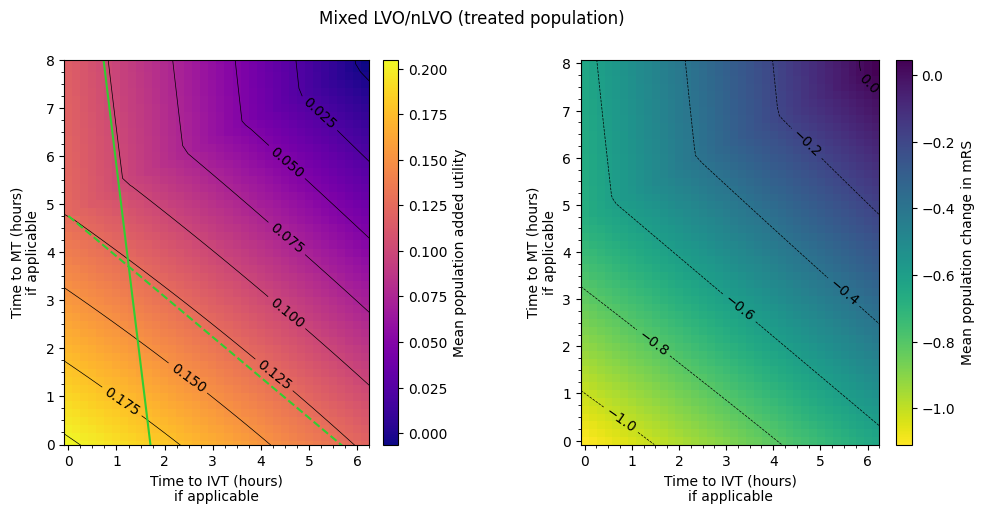

In [41]:
fig, axs = plot_matrices(
    dict_df_patients['treated_ischaemic'],
    outcome_labels,
    grid_shape,
    grid_extent,
    vlims,
    major_step,
    minor_step,
    levels,
    title='Mixed LVO/nLVO (treated population)',
    cmaps=cmaps,
    return_axs=True
)

axs[0].plot([0, 6], [14, 14 + 6 * x_ivt_better], color='LimeGreen')
axs[0].plot([0, 6], [4.75, 4.75 + 6 * x_mt_better], color='LimeGreen', linestyle='--')
axs[0].set_ylim(0, 8)

plt.show()

The lines don't match the contours exactly because the straight line fits to changing outcomes with time are only approximate.

## Conclusions for the treated ischaemic population

LVO treated with both MT and IVT uses the MT outcomes if time to treatment $t_{\mathrm{MT}} < 4.75 hr + 0.5 \times t_{\mathrm{IVT}}$.

In the MT-better regime, if time to IVT is increased, time to MT must be decreased by around four-fifths of the amount to keep the same utility. If time to MT is decreased by less than four-fifths of the amount that time to IVT is increased by, then the overall outcome will worsen.

In the IVT-better regime, if time to IVT is increased, time to MT must be decreased by around eight times the amount to keep the same utility. If time to MT is decreased by less than eight times the amount that time to IVT is increased by, then the overall outcome will worsen.
